# Deep-Learning with Keras

#### Ugur URESIN, AI Engineer | Data Scientist
#### Mail: uresin.ugur@gmail.com

## Chapter 06. Neural Networks - Regularization

### Creating an Example Network using IMDB data

In [1]:
## IMPORTING LIBRARIES
import numpy as np
from keras.datasets import imdb


## IMPORTING DATA
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


## PROCESSING THE DATA
'''
train_labels and test_labels are lists of 0s and 1s, where
- 0 stands for negative  
- 1 stands for positive
'''

# word_index is a dictionary that maps words to an integer index
word_index = imdb.get_word_index()

# converts integer indices to a word
reverse_word_index = dict([(val,key) for (key,val) in word_index.items()])

# **Decoding the review**  
# Note that the indices are offset by 3 because 0, 1, and 2 are reserved indices
# for “padding,” “start of sequence,” and “unknown.”
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

#Encoding the integer sequences into a binary matrix
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# Vectorization of the labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


## CREATING THE MODEL
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compilation
from keras import losses
from keras import metrics
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])


## CREATING A VALIDATION SET
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


## CREATING A HISTORY
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
C:\Users\uuresin\.conda\envs\tensorflow\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\uuresin\.conda\envs\tensorflow\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or sha

Epoch 1/20
30/30 [==============================] - 1s 27ms/step - loss: 0.5102 - binary_accuracy: 0.7901 - val_loss: 0.3848 - val_binary_accuracy: 0.8649
Epoch 2/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3056 - binary_accuracy: 0.9028 - val_loss: 0.3221 - val_binary_accuracy: 0.8716
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2243 - binary_accuracy: 0.9267 - val_loss: 0.2832 - val_binary_accuracy: 0.8880
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1743 - binary_accuracy: 0.9433 - val_loss: 0.2768 - val_binary_accuracy: 0.8894
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1435 - binary_accuracy: 0.9537 - val_loss: 0.2857 - val_binary_accuracy: 0.8861
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1184 - binary_accuracy: 0.9642 - val_loss: 0.2994 - val_binary_accuracy: 0.8815
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - los

In [2]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

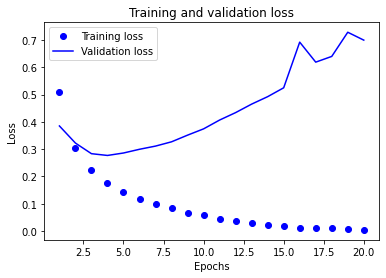

In [3]:
## EVALUATING THE PERFORMANCE
#Plotting the training and validation loss
import matplotlib.pyplot as plt
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['loss']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss') #bo:blue-dot
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') #b:solid-blue
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

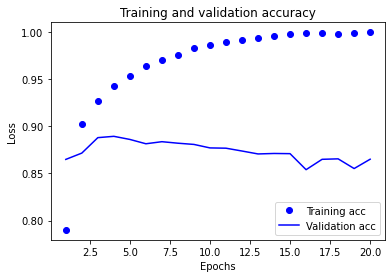

In [4]:
#Plotting the training and validation accuracy
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Adding L2 Regularization to the Model

In [5]:
from keras import regularizers
model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer = regularizers.l2(0.001),
                      activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                      activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [6]:
# Compilation
from keras import losses
from keras import metrics
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])


## CREATING A VALIDATION SET
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


## CREATING A HISTORY
history2 = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 24ms/step - loss: 0.5762 - binary_accuracy: 0.7881 - val_loss: 0.4613 - val_binary_accuracy: 0.8632
Epoch 2/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3918 - binary_accuracy: 0.8913 - val_loss: 0.3814 - val_binary_accuracy: 0.8802
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3128 - binary_accuracy: 0.9158 - val_loss: 0.3784 - val_binary_accuracy: 0.8668
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2748 - binary_accuracy: 0.9271 - val_loss: 0.3375 - val_binary_accuracy: 0.8877
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2519 - binary_accuracy: 0.9355 - val_loss: 0.3424 - val_binary_accuracy: 0.8870
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2354 - binary_accuracy: 0.9392 - val_loss: 0.3405 - val_binary_accuracy: 0.8833
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - los

In [7]:
history_dict2 = history2.history

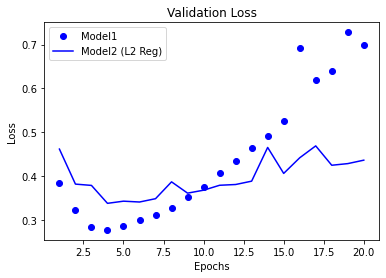

In [8]:
#Plotting the training and validation accuracy
val_loss_model1 = history_dict['val_loss']
val_loss_model2 = history_dict2['val_loss']

epochs1 = range(1, len(history_dict['loss']) + 1)
epochs2 = range(1, len(history_dict2['loss']) + 1)

plt.plot(epochs1, val_loss_model1, 'bo', label='Model1')
plt.plot(epochs2, val_loss_model2, 'b', label='Model2 (L2 Reg)')
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Adding DropOut Regularization to the Model

In [9]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [10]:
# Compilation
from keras import losses
from keras import metrics
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])


## CREATING A VALIDATION SET
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


## CREATING A HISTORY
history3 = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 25ms/step - loss: 0.6168 - binary_accuracy: 0.6571 - val_loss: 0.4993 - val_binary_accuracy: 0.8287
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.4972 - binary_accuracy: 0.7752 - val_loss: 0.3961 - val_binary_accuracy: 0.8644
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.4155 - binary_accuracy: 0.8289 - val_loss: 0.3410 - val_binary_accuracy: 0.8733
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3588 - binary_accuracy: 0.8628 - val_loss: 0.3029 - val_binary_accuracy: 0.8872
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3142 - binary_accuracy: 0.8852 - val_loss: 0.2813 - val_binary_accuracy: 0.8885
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2772 - binary_accuracy: 0.8995 - val_loss: 0.2743 - val_binary_accuracy: 0.8890
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - los

In [11]:
history_dict3 = history3.history

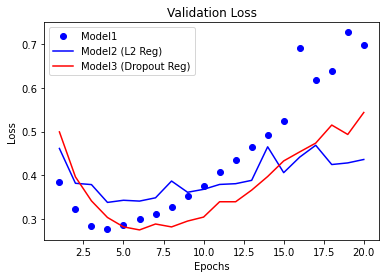

In [12]:
#Plotting the training and validation accuracy
val_loss_model1 = history_dict['val_loss']
val_loss_model2 = history_dict2['val_loss']
val_loss_model3 = history_dict3['val_loss']

epochs1 = range(1, len(history_dict['loss']) + 1)
epochs2 = range(1, len(history_dict2['loss']) + 1)
epochs3 = range(1, len(history_dict3['loss']) + 1)

plt.plot(epochs1, val_loss_model1, 'bo', label='Model1')
plt.plot(epochs2, val_loss_model2, 'b', label='Model2 (L2 Reg)')
plt.plot(epochs3, val_loss_model3, 'r', label='Model3 (Dropout Reg)')
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()